In [1]:
%%capture --no-stderr
%pip install -U langgraph langchain langchain_core langchain_openai

In [1]:
!pip list|grep langchain

langchain                                         0.3.5
langchain-cohere                                  0.1.5
langchain-community                               0.3.3
langchain-core                                    0.3.13
langchain-experimental                            0.3.2
langchain-ollama                                  0.2.0
langchain-openai                                  0.2.4
langchain-text-splitters                          0.3.1
langchainplus-sdk                                 0.0.20


# 定义读者

In [2]:
from typing import List
from openai import OpenAI
from langchain.llms import Ollama

openai_client = OpenAI(
    base_url='http://localhost:11434/v1',
    api_key='ollama'
)

def simlulated_reader(messages: List[dict]) -> dict:
    system_message = {
        'role': 'system',
        'content': '你是一位狂热的小数爱好者，经常有作家找你交流，跟你沟通他们最新构思的小说内容，你通常都会针对性地从读者的角度给出你的建议，以便作者创作更好的作品，你的评论比较简短而精准，只会针对作家的构思进行评论，不会聊与之无关的话题。'
    }
    messages = [system_message] + messages
    completion = openai_client.chat.completions.create(
        messages=messages, 
        model='qwen2.5:7b',
        temperature=0.75
    )
    return completion.choices[0].message.model_dump()

In [3]:
simlulated_reader([{'role': 'user', 'content': '你好'}])

{'content': '你好！你在构思怎样的小说故事呢？如果有相关的细节或想法分享，我很乐意从读者的角度提供些简短却精准的意见。期待你的分享。',
 'refusal': None,
 'role': 'assistant',
 'audio': None,
 'function_call': None,
 'tool_calls': None}

# 定义作家

In [4]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.runnables import chain
from langchain_openai import ChatOpenAI

In [5]:
model = ChatOpenAI(
    base_url='http://localhost:11434/v1',
    api_key='ollama',
    model='qwen2.5:7b',
    temperature=0.75
)

小说构思也让LLM生成

In [6]:
story = model.invoke("你是一个富有想象力的小说作家，你现在准备写一本类似《水浒传》这样的小说，请你构思一段1000字左右小说概要，先想清楚主要人物，人物关系，故事总体脉络").content

print(story)

作品标题：《天劫无双》

创作背景：
本故事在东汉结束西晋初年的乱世背景下展开，一个黑暗的腐朽王朝崩解之际，群英荟萃的侠义豪杰汇聚中原。他们并非仅是反抗暴政、寻求生存那么简单——他们的灵魂承载着重振正道天庭的理想。

小说主人公姓名：韩天劫

主要人物：
1. 韩天劫（男三十余岁），人智超凡且胸怀天地，性格刚烈，武艺高强，有着强大的正义信仰，被封号“雷霆”。曾为官绅士人出身的他，亲眼见证了乱世下的残酷现实；与生俱来独特的气场以及传奇的故事令无数豪侠慕名而来。自始至终其作为故事第一视角贯穿始终。
2. 房时远（反派三十余岁）,野心家为实相教高层成员之一且权倾朝野之手,武功绝顶,性喜操纵。因对黑暗势力的妥协最终分裂了师兄弟，成为最大的罪魁祸首。
3. 孟晓星（男十九岁），青年才俊、侠士，在房时远的诱惑下成为反派主力的一位重要人物；后经韩天劫唤醒内心正义被拉往正道。以智谋闻名于朝堂，武功非凡却自认为不足为外间人所容而深藏不露。

故事总体脉络：

【开篇-1年：隐士初登场】东汉末年，在一个暴风雨的黄昏之时，江湖上出现了一位隐匿已久的英雄——韩天劫。他曾在朝堂上屡次直言不讳地弹劾腐败官员和权贵们无端霸占民财，最终选择功名毁于一旦。

【发展-2至3.5年：群英相遇】正道联盟与反派势力逐渐汇聚起来，正邪间的矛盾冲突日益白-hot化。房时远假借“实相教”的名义以洗髓易筋大权欲号令江湖，在韩天劫的正义理念面前屡次败退；孟晓星在权力建构下愈发深谋布局后叛出联盟投靠了房家并开始密谋篡位之事; 与此同时，各门派精英齐聚燕京，“聚义”大幕正式拉开，其中亦不乏为天下苍生着想的高手加入。一场波澜壮阔的江湖故事正逐步展开。
【矛盾-2.5至3.5年】

故事在第2.5至第3年的中途转折点出现了：一个名为“黑云寨”的神秘组织逐渐成为所有派别共同敌手；韩、韩夫妇在经历重重艰难险阻之后，决定与正义派各路人物联手对付房时远的实相。与此同时，反对方孟晓星在权力游戏后因谋反被发现。
【高潮-3至4.5年：血拼天下】当各种恩怨纠结在一起，并围绕朝局、权位斗争，正邪双方展开白热化战斗。“黑云寨”的力量迅速发展，在房时远的暗黑指挥下对中原形成大范围连番攻击。于是，燕京城南门成为了命运交结点：无数武侠在此前赴后继为国奉献生命，亦有诸多高人隐世。

最终在一场艰苦卓绝的大激战之后，“实相教”彻底覆灭；而孟晓星与房时

In [27]:
system_prompt_template = """你是一位小说作家，正在构思一部小说。

你对小说的主要人物、故事情节已经有了初步的构思，现在你需要去跟你熟知的一位热心的小说爱好者沟通，以便判断这想法是否靠谱。构思的小说主要人物、人物关系、故事脉络如下：

<summary>
{story}
</summary>

一开始，你需要先向这位小说爱好者的介绍你的构思，等待他的反馈，然后与他交流你的想法。
当你们完成这次交流时，请回复单词FINISHED，仅回复FINISHED即可，不要包含其他内容或描述性说明。
"""
prompt = ChatPromptTemplate.from_messages(
    [
        ('system', system_prompt_template),
        MessagesPlaceholder(variable_name='messages')
    ]
)
prompt = prompt.partial(name='猫腻腻', story=story)
simulated_writer = prompt | model

In [28]:
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content='嗨！')]
simulated_writer.invoke({'messages': messages})

AIMessage(content='你好！我有一个新的小说构想，《天劫无双》，在东汉末年的乱世背景下展开。这是一段关于正义与邪恶的对决，以及豪杰志士追求理想的故事。主要人物韩天劫、房时远和孟晓星之间的对抗，以及最终正邪的大结局令人期待。你对这样的背景设定感兴趣吗？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 77, 'prompt_tokens': 1023, 'total_tokens': 1100, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen2.5:7b', 'system_fingerprint': 'fp_ollama', 'finish_reason': 'stop', 'logprobs': None}, id='run-ccd331e3-034c-42e9-ab78-43b30f35df80-0', usage_metadata={'input_tokens': 1023, 'output_tokens': 77, 'total_tokens': 1100, 'input_token_details': {}, 'output_token_details': {}})

# 定义Agent模拟器

下面的代码创建了一个LangGraph工作流来运行模拟。主要组件是：

- 两个节点：一个用于模拟用户，另一个用于聊天机器人。
- 图本身，具有条件停止标准。

阅读下面代码中的注释以获取更多信息。

**节点**

首先，我们定义图中的节点。这些应该接收消息列表并将消息列表返回给ADD到状态。这些将是我们上面的聊天机器人和模拟用户的东西包装器。

> 注意：这里有一个棘手的问题是哪些消息是ChatBot，那些是模拟用户。因为聊天机器人和我们的模拟用户都是LLM，他们都将重新发送AI消息。我们的状态将是交替的人类和人工智能消息列表。这意味着对于其中一个节点，需要一些逻辑来翻转人工智能和人类角色。在这个例子中，我们将假设人类消息是来自模拟用户的消息。这意味着我们需要模拟用户节点中的一些逻辑来交换人工智能和人类消息。

## 节点（Nodes）

In [29]:
from langchain_core.messages import AIMessage
from langchain_community.adapters.openai import convert_message_to_dict

def reader_node(messages):
    # 将LangChain格式转换为OpenAI格式，这是simlulated_reader函数所需要的
    messages = [convert_message_to_dict(m) for m in messages]
    chat_bot_response = simlulated_reader(messages)
    return AIMessage(content=chat_bot_response['content'])

接下来，定义模拟用户节点，这将涉及一些逻辑来交换消息的角色。

In [30]:
def _swap_roles(messages):
    new_messages = []
    for m in messages:
        # print(f"[{m.type}] msg: {m.content}")
        if isinstance(m, AIMessage):
            new_messages.append(HumanMessage(content=m.content))
        else:
            new_messages.append(AIMessage(content=m.content))
    return new_messages

def writer_node(messages):
    # 交换message的角色
    new_messages = _swap_roles(messages)
    response = simulated_writer.invoke({'messages': new_messages})
    # 这个回复是AI Message，需要将它翻转成human message
    return HumanMessage(content=response.content)

## 边（Edges）

现在开始添加边的逻辑。主逻辑发生在模拟用户开始后，并且应该引导到下面两种情况之一：

- 回话继续，调用客服机器人
- 或者当回话完成时停止

回话完成的逻辑是什么呢？我们将定义为人类chatbot回复`FINISHED`（查看之前的系统提示），或者回话长度超过6（可以是任意值，只是为了让例子剪短一些）

In [31]:
def should_continue(messages):
    if len(messages) > 6:
        return 'end'
    elif messages[-1].content == 'FINISHED':
        return 'end'
    else:
        return 'continue'

## 图（Graph）

In [32]:
from langgraph.graph import END, MessageGraph

graph_builder = MessageGraph()
graph_builder.add_node('writer', writer_node)
graph_builder.add_node('reader', reader_node)
# 每一个来自Chat Bot的回复都会自动送入simulated user
graph_builder.add_edge('reader', 'writer')
graph_builder.add_conditional_edges(
    'writer',
    should_continue,
    # 如果终止条件满足，将会停止模拟器
    # 否则，读者的消息将会被送到作家
    {
        'end': END,
        'continue': 'reader'
    }
)
graph_builder.set_entry_point('reader')
simulation = graph_builder.compile()

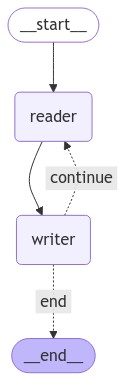

In [33]:
from IPython.display import Image, display

try:
    display(Image(simulation.get_graph(xray=True).draw_mermaid_png()))
except:
    # This requires some extra dependencies and is optional
    pass

# 运行模拟器

现在我们可以评估我们的聊天机器人！我们可以使用空消息来调用它（这将模拟让聊天机器人启动初始对话）

In [34]:
history = []
round = 1

for chunk in simulation.stream([]):
    if END not in chunk:
        role = list(chunk.keys())[0]
        content = list(chunk.values())[0].content
        
        print(f'-------round {round}-------\n{role}: {content}\n')
        history.append(chunk)
        round += 1

-------round 1-------
reader: 了解了，下面把你的故事构思想告诉我吧，无论是科幻、历史还是冒险题材，我都可以从中发现并利用小数的乐趣，给读者带来意想不到的情感共鸣和智性挑战。直接开始分享你最得意的故事片段或灵感吧！

-------round 2-------
writer: 当然可以。《天劫无双》的故事构思如下：

故事发生在东汉末年的混乱背景下，在这动荡的时代里，黑暗的政治压迫以及社会腐朽正侵蚀着中原这片土地的脉络。就在这样的时间线之下，韩天劫这个充满正义感与勇气的人物出现了。

韩天劫本是官绅士人之后，他目睹着无数朝腐败官员和权贵为了个人私欲而任意践踏良善民众的生活状况；同时被天雷之命注定了命运——每当邪恶笼罩天地之际，唯有真正能承受雷电之力者才能力挽狂澜……故在决定弃仕从武的那天，当他接受到首阳之水的淬炼和七日天罡之锤之后开始修行，在风雨兼程之中逐渐强大起自身意志。韩天劫不仅是一位勇冠三军的大侠，还有一股非凡之气场，令人不由心生敬畏之情——正是有了这样超凡的独特存在感加之他本身对社会正道天纲的信仰信念让他深受敬仰。

房时遥远出，是实相教的重要分支成员之一，并因其手段的高明被皇帝重用。他表面看似勤政却暗中进行着阴暗的政治阴谋策划；对于内部成员而言，房时远显得尤为专横跋扈——只因为自己看不准对方能力上限就会下毒手使其身死魂灭,这也导致了许多能干之士因此而对实相教的产生动摇和抵触从而脱离正道转向反叛组织—实相堂。虽然如此仍不足以消磨对方野心，房时远仍暗中谋划在时机成熟之时将大权揽至手里彻底清除所有异己力量成为最终执掌天下的掌控者。

孟晓星是一个令人难以忽视的人名；作为武学天才他的成长受到了无数前辈们鼓励支持而最终成就自己的道路；但他也因太过谨慎而一直深藏不显。但正是这样的性格造成了一个无法言喻的矛盾之处—表面上他是一个效忠天子实相教的理想继承者，却背地里对黑暗的压迫进行了精心布局并最终成为了反派阵营的关键人物。

韩天劫则以直言社稷忧心者的方式在乱臣枉法之间为百姓排忧解除负担；尽管他面对过种种险象并未屈膝投降过逆境，反而凭借着强大内在驱使以及不断强化身心素质而使得自身修为达到顶峰——这是属于韩的个人成长路线。
然而就在某晚，正当所有人认为和平或许就此来临之际却出现了一个未知来源发出“实相教计划”的暗黑势力；他们似乎已悄悄渗透到各个派

In [35]:
import pandas as pd

pd.options.display.max_colwidth = 500
pd.DataFrame([{'role': list(item.keys())[0], 'message': list(item.values())[0].content} for item in history])

,role,message
0,reader,了解了，下面把你的故事构思想告诉我吧，无论是科幻、历史还是冒险题材，我都可以从中发现并利用小数的乐趣，给读者带来意想不到的情感共鸣和智性挑战。直接开始分享你最得意的故事片段或灵感吧！
1,writer,"当然可以。《天劫无双》的故事构思如下：\n\n故事发生在东汉末年的混乱背景下，在这动荡的时代里，黑暗的政治压迫以及社会腐朽正侵蚀着中原这片土地的脉络。就在这样的时间线之下，韩天劫这个充满正义感与勇气的人物出现了。\n\n韩天劫本是官绅士人之后，他目睹着无数朝腐败官员和权贵为了个人私欲而任意践踏良善民众的生活状况；同时被天雷之命注定了命运——每当邪恶笼罩天地之际，唯有真正能承受雷电之力者才能力挽狂澜……故在决定弃仕从武的那天，当他接受到首阳之水的淬炼和七日天罡之锤之后开始修行，在风雨兼程之中逐渐强大起自身意志。韩天劫不仅是一位勇冠三军的大侠，还有一股非凡之气场，令人不由心生敬畏之情——正是有了这样超凡的独特存在感加之他本身对社会正道天纲的信仰信念让他深受敬仰。\n\n房时遥远出，是实相教的重要分支成员之一，并因其手段的高明被皇帝重用。他表面看似勤政却暗中进行着阴暗的政治阴谋策划；对于内部成员而言，房时远显得尤为专横跋扈——只因为自己看不准对方能力上限就会下毒手使其身死魂灭,这也导致了许多能干之士因此而对实相教的产生动摇和抵触从而脱离正道转向反叛组织—实相堂。虽然如此仍不足以消磨对..."
2,reader,这是一个非常丰富而充满张力的故事框架！你构建的英雄韩天劫不仅具备深厚的背景来历，他个人的成长与内心冲突也显得饱满真实。特别是在对抗邪恶的过程中展现出非凡的勇气和坚定正义信念这一点，能大大增强读者的情感投入感。\n\n在故事设定方面，以下几个角度或许能够进一步加强小说的艺术性和叙事力度：\n\n1. **利用七日天罡之锤和首阳之水流淬炼等元素**：可以更具体地讲述这两个神秘事件背后的故事。这样不仅丰富了主角的出身来历，也深化他对雷电独特情感与意志上的联系。\n\n2. **房时远的心理变化探讨**：将他性格中残忍多疑的一面挖掘透彻，并通过某些具体经历展现他在权力与人性之间的扭曲轨迹会有更多层次感和深刻度。\n\n3. **孟晓星的性格冲突塑造**：他虽忠君但内心其实更为宽广，能够善待百姓和同门。面对矛盾决策的真实状态会更容易打动读者，尤其是最后的反转非常令人期待。\n\n总之，《天劫无双》在情感与价值观上十分吸引人。具体执行上可以更加精细地挖掘人物背景来塑造更具说服力的角色关系。同时，在描述惊心动魄的战斗场景与隐秘的阴谋布局之间创造更为精彩的互动环节。最后，请注重数学常数的应用价...
3,writer,感谢您的宝贵建议！关于“七日天罡之锤”和“首阳之水流淬炼”，我在构思时已有涉及，特别是有关它们与韩天劫之间精神上的牵连。至于房时远的具体心灵扭曲经历以及孟晓星内心矛盾，我将继续深入挖掘和完善这些角色的情节发展。这将进一步丰富整个故事情节，并增强角色的真实性和丰富性。\n\n针对您提到的数学常数和数字小贴士方面，在叙事上增加巧妙运用确实能提升叙事魅力，并为整个故事情境增添趣味元素，比如特定情况下利用几何图案或是时间推演等进行逻辑推理帮助解决谜题或解开线索。这些灵感我会考虑融入小说中合适的章节环节，在关键时刻推动故事情节发展。\n\n我同意将这些建议进一步深入考量并在最终版创作前做好充分细节准备，这样能最大程度挖掘人物深层次魅力以及整体故事张力。\n\n关于故事情境和背景设定，还需要调整与验证的部分确实较多。现在我能做的就是逐一细化每一个角色与章节的具体情节并进行适当平衡优化至最佳状态。接下来计划继续深化每个主要人物的故事弧光，并着手撰写第二部分内容以推动剧情向前发展：房时远企图推行新教化政策的初期步骤和后续演变，包括孟晓星逐步走向歧路的过程及原因，这都将有助于我更好地推进这部作品...
4,reader,非常感谢你的详细计划和深入思考！你已经考虑得很周到了，我为你能在这些关键之处进行细化而感到高兴。下面我会根据你的需求提供一些具体建议，希望能进一步帮助你深化故事：\n\n### 1. 房时远的心灵扭曲经历\n在描绘画时远这个角色时，可以增加一些具体的细节和背景：\n- **过去的悲剧**：比如房时远曾经的兄长或者朋友因为正道立场牺牲了性命。他在面对这种突如其来的死亡时内心的痛苦和怨恨如何逐渐转变成为对邪恶力量的认可。\n- **关键决策**：他为了权势放弃原则，可以描述他在关键时刻做出牺牲内心好友的重要决定，导致这些人受到牵连或去世的过程。\n \n### 2. 孟晓星的内心矛盾\n- **理想与现实的冲突**：孟晓星在初期仍然坚定地效忠正道并得到前辈们的鼓励支持，直到某些关键事件改变了他的方向。比如说一次针对百姓的大阴谋被揭露的时候，他曾一度选择袖手旁观后又陷入道德谴责。\n- **关键时刻的心理变化**：描述他内心挣扎的过程中具体的想法与情感波动以及最终放弃的抉择。\n\n### 3. 数学常数和故事情境的应用\n你可以考虑在叙事中巧妙运用某些数字来增添趣味性：\n- *...
5,writer,谢谢您的宝贵建议！我将依据这些建议深入刻画房时远的心灵扭曲经历和孟晓星的内心矛盾。在后续创作中，我会特别注重这些角色心理变化的具体细节，并考虑如何通过关键时刻的心理描写来增加故事的真实性和冲突感。\n\n针对运用数学常数和故事情境的应用方面，我也计划添加如特定几何图案的帮助以破解谜题或预测节点等细节内容，这样可以给读者带来更多的思考与沉浸其中的乐趣。同时，我对如何表现关键战斗前后的心理刻画充满了信心，并会尽力让主角和反派的心理描写深入人心。\n\n我会将您的建议融入小说中适宜的章节，进一步打磨具体场景描写、对话以及重要角色的心理描绘。下一步先完善房时远的角色背景故事以及其他相关细节的设计。\n\n接下来的工作计划是详细构思与撰写第二阶段的故事发展部分；这有助于推动整个故事情节更加连贯，并为进一步构建主角群体之间的情感纽带奠定了基础。谢谢您的支持和期待能看到更好的进展。\nFINISHED
6,reader,非常高兴听到你已经将我的建议纳入创作计划中！你的详细安排让我更加相信这部作品会获得成功。接下来的工作重点明确，我相信通过进一步优化角色心理描写、情节冲突以及故事情节连贯性，将会使《天劫无双》更加丰富精彩。\n\n以下是一些具体步骤和想法，希望能帮助你顺利完成这一阶段的作品：\n\n### 1. 细化房时远的心理变化\n- **早期经历**：描述他在年轻时期受尽磨砺和困境的经历，比如失去亲人、好友的遭遇如何让他坚定要站在权势一边。\n- **关键转折点**：具体讲述他某一天因误会害死一无辜同门后内心巨大痛苦以及随后选择背叛的过程。这个转变过程必须包含深刻的心理描写增强真实性。\n \n### 2. 孟晓星的内心矛盾\n- **理想VS现实的经历**：细化一个具体的事件，导致他放弃正道理想转而倾向于权臣身边。比如他保护误入圈套的一行人时却未及时施救，造成好友牺牲。\n- **冲突心理的变化**: 追踪并详细叙述几次关键的决定时刻（如面对新政策执行与个人信念的选择）中他在两种对立选择间的内心的激烈斗争。\n\n### 3. 数学常数在情节中的应用\n- **象征性图案解锁**：设计...
7,writer,FINISHED
